In [66]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('./data/유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [29]:
df_y = df["diagnosis"]
df_x = df.drop('diagnosis',axis=1, inplace=False)

In [30]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [31]:
df_train_x, df_val_x, df_train_y, df_val_y, = train_test_split(df_train_x,df_train_y,test_size=0.4,
                                                                       random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data Y size : {}'.format(df_val_y.shape))

train data X size : (238, 30)
train data Y size : (238,)
validation data X size : (160, 30)
validation data Y size : (160,)


In [32]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
print('Score on validation set:{:.3f}'.format(tree_uncustomized.score(df_val_x,df_val_y)))

Score on training set:1.000
Score on validation set:0.919


In [33]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [34]:
train_accuracy=[];val_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    val_accuracy.append(tree.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesLeaf']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['ValidationtAccuracy']=val_accuracy
df_accuracy_depth.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationtAccuracy
0,1,0.941,0.912
1,2,0.954,0.919
2,3,0.987,0.938
3,4,0.992,0.944
4,5,1.000,0.919
5,6,1.000,0.919
6,7,1.000,0.919
7,8,1.000,0.919
8,9,1.000,0.919
9,10,1.000,0.919


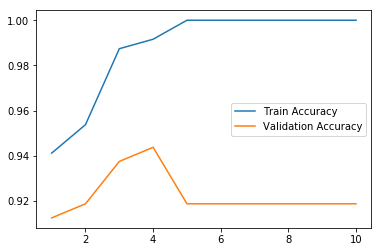

In [35]:
plt.plot(para_depth, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_depth, val_accuracy, linestyle='-',label='Validation Accuracy')
plt.legend()

> 최대 깊이는 4가 적당한듯 보여진다

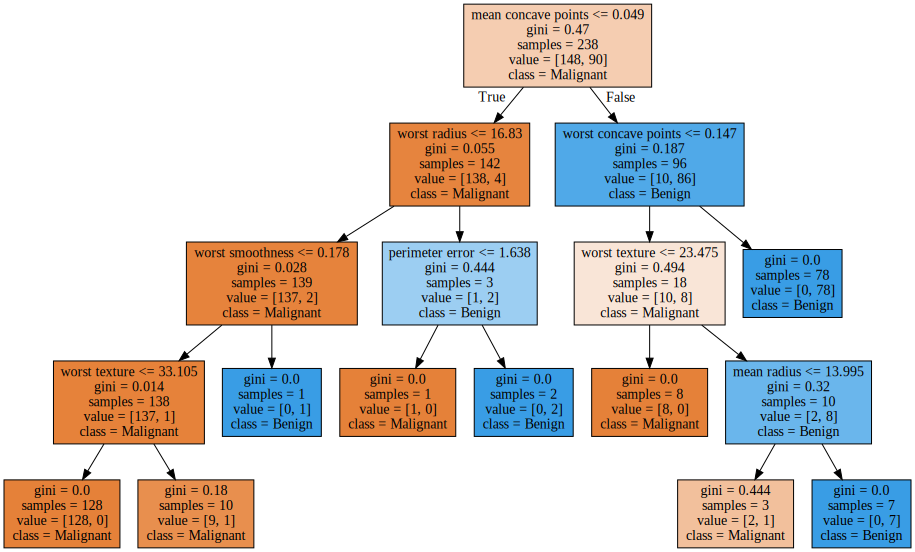

In [36]:
v_feature_names=df_train_x.columns
tree_depth3 = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_depth3.fit(df_train_x,df_train_y)

export_graphviz(tree_depth3,out_file='tree_depth3.dot',class_names=['Malignant','Benign'],
                feature_names=v_feature_names,impurity=True,filled=True)

with open('tree_depth3.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [37]:
train_accuracy=[];val_accuracy=[]
para_split=[n_split for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234,max_depth=4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    val_accuracy.append(tree.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesplit']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValidationAccuracy']=val_accuracy
df_accuracy_split.round(3)

,MinSamplesplit,TrainAccuracy,ValidationAccuracy
0,2,0.992,0.944
1,3,0.992,0.944
2,4,0.987,0.925
3,5,0.987,0.925
4,6,0.987,0.925
5,7,0.987,0.925
6,8,0.987,0.925
7,9,0.987,0.925
8,10,0.987,0.925


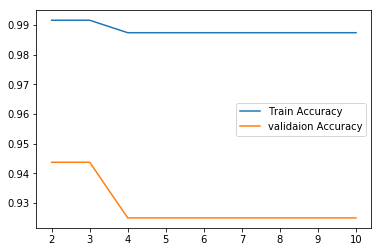

In [38]:
plt.plot(para_split, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_split, val_accuracy, linestyle='-',label='validaion Accuracy')
plt.legend()

> 최소 split는 3이 적당하다 이후로 급격히 감소하기 때문

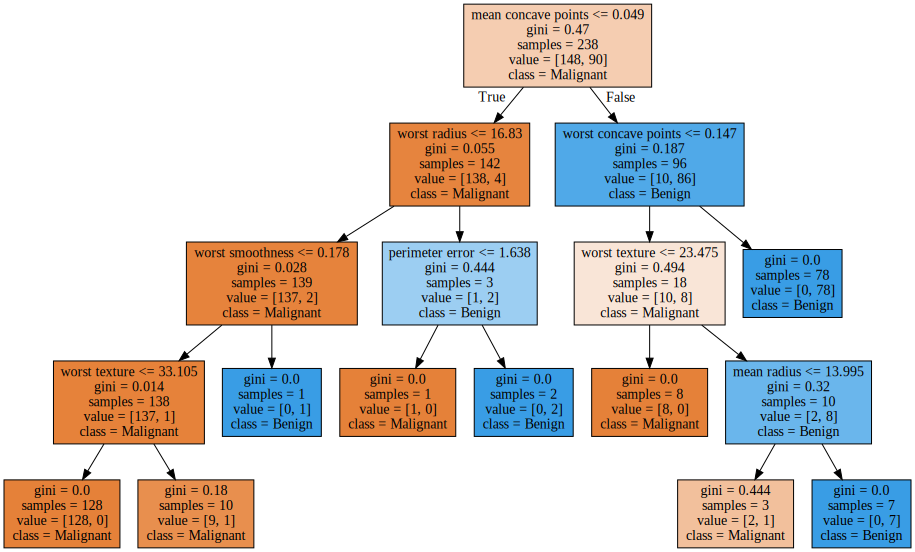

In [39]:
tree_split9 = DecisionTreeClassifier(random_state=1234, max_depth=4, min_samples_split=3)
tree_split9.fit(df_train_x,df_train_y)
export_graphviz(tree_split9,out_file='tree_split9.dot',class_names=['Malignant','Benign'],
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split9.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
train_accuracy=[];val_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234,max_depth=4, min_samples_split=3, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    val_accuracy.append(tree.score(df_val_x,df_val_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesplit']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValidaionAccuracy']=val_accuracy
df_accuracy_leaf.round(3)

,MinSamplesplit,TrainAccuracy,ValidaionAccuracy
0,10,0.950,0.925
1,20,0.941,0.919
2,30,0.941,0.912
3,40,0.941,0.912
4,50,0.941,0.912
5,60,0.941,0.912
6,70,0.941,0.912
7,80,0.941,0.912
8,90,0.941,0.912
9,100,0.933,0.900


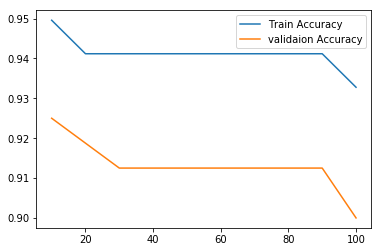

In [42]:
plt.plot(para_leaf, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_leaf, val_accuracy, linestyle='-',label='validaion Accuracy')
plt.legend()

> 10을 최소 리프노드로 정햇지만, 아래의 트리에서 과소적합이 보여졌기 때문에 파라미터에서 제거함

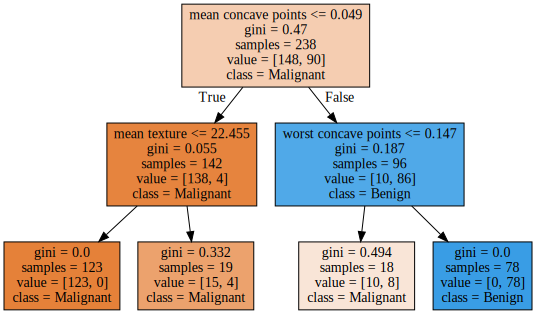

In [46]:
tree_leaf20 = DecisionTreeClassifier(random_state=1234, max_depth=4,  min_samples_leaf=10,min_samples_split=3)
tree_leaf20.fit(df_train_x,df_train_y)
export_graphviz(tree_leaf20,out_file='tree_leaf20.dot',class_names=['Malignant','Benign'],
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf20.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

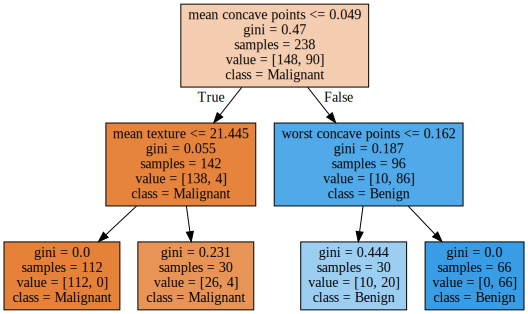

In [59]:
tree_leaf20 = DecisionTreeClassifier(random_state=1234, max_depth=4,  min_samples_leaf=30,min_samples_split=3)
tree_leaf20.fit(df_train_x,df_train_y)
export_graphviz(tree_leaf20,out_file='tree_leaf20.dot',class_names=['Malignant','Benign'],
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf20.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

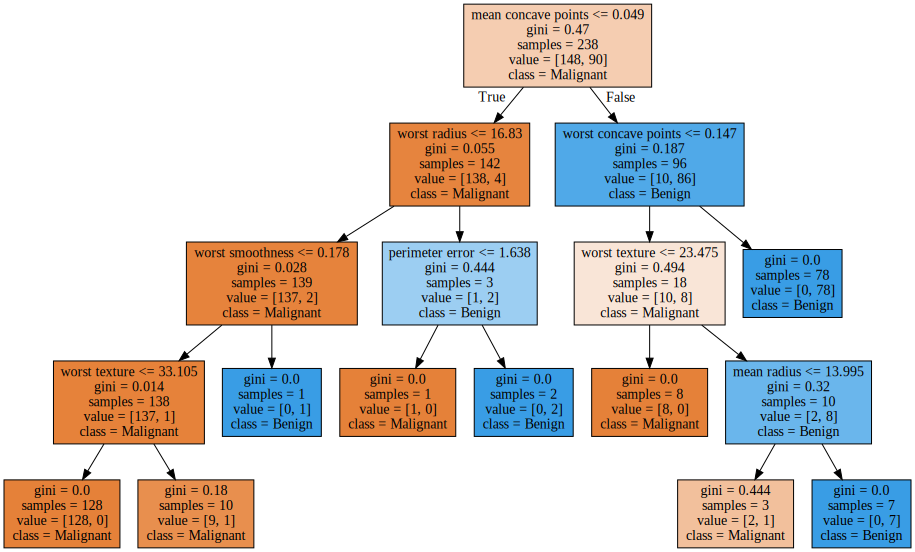

In [47]:
tree_leaf20 = DecisionTreeClassifier(random_state=1234, max_depth=4,min_samples_split=3)
tree_leaf20.fit(df_train_x,df_train_y)
export_graphviz(tree_leaf20,out_file='tree_leaf20.dot',class_names=['Malignant','Benign'],
                feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf20.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [48]:
tree_final = DecisionTreeClassifier( max_depth=4,min_samples_split=3)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

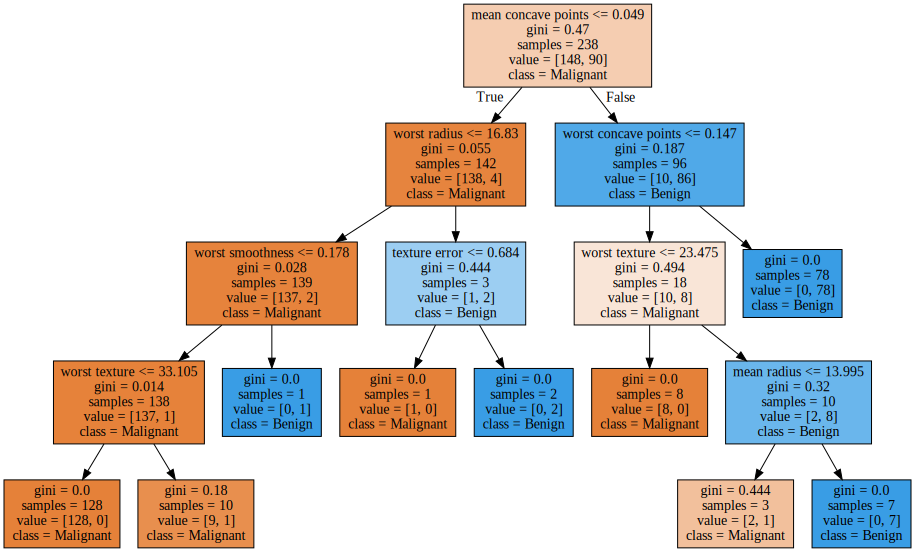

In [49]:
export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Malignant','Benign'],feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [70]:
y_pred = tree_final.predict(df_val_x)
fpr, tpr, thresholds = roc_curve(df_test_y, test_y_pred)
roc_aur = auc(fpr,tpr)

print('Accuracy on training set:{:.3f}'.format(tree_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('Accuracy on Validaion set:{:.3f}\n'.format(tree_final.score(df_val_x,df_val_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_val_y,y_pred)))
print('\nAUC : {}'.format(roc_aur))


Accuracy on training set:0.992
Accuracy on test set:0.936
Accuracy on Validaion set:0.950

Confusion matrix:
[[99  5]
 [ 3 53]]

AUC : 0.927922077922078


Text(0, 0.5, '설명변수')

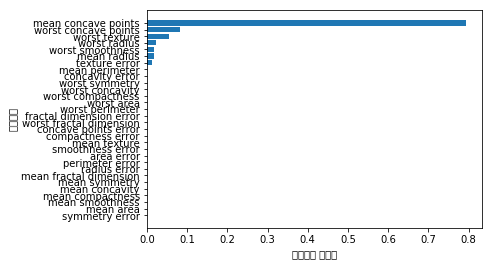

In [57]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_names
df_importance['Importance']=tree_final.feature_importances_
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)
df_importance.sort_values('Importance',ascending=True, inplace=True)


coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [58]:
estimator=DecisionTreeClassifier()
parm_gird={'max_depth':para_depth, 'min_samples_split':para_split}

grid_dt=GridSearchCV(estimator,parm_gird,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter:
{'max_depth': 3, 'min_samples_split': 8}

best score:
0.937


In [60]:

estimator=DecisionTreeClassifier()
parm_gird={'max_depth':para_depth, 'min_samples_split':para_split,'min_samples_leaf':para_leaf}

grid_dt=GridSearchCV(estimator,parm_gird,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter:
{'max_depth': 3, 'min_samples_leaf': 70, 'min_samples_split': 7}

best score:
0.916


In [76]:
test_y_pred = tree_final.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, test_y_pred)
roc_aur = auc(fpr,tpr)

print('Accuracy on training set:{:.3f}'.format(tree_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('Accuracy on Validaion set:{:.3f}\n'.format(tree_final.score(df_val_x,df_val_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,test_y_pred)))
print('\nAUC : {}'.format(roc_aur))


Accuracy on training set:0.992
Accuracy on test set:0.936
Accuracy on Validaion set:0.950

Confusion matrix:
[[101   4]
 [  7  59]]

AUC : 0.927922077922078
